# 자기회귀 이동평균 통합 (ARIMA, Autoregressive Integrated Moving Average) 모델

## 개요
ARIMA 모델은 AR 모델과 MA 모델을 결합하고, **차분(differencing)**을 통해 **데이터의 정상성(stationarity)**을 확보한 후 예측하는 모델

$ ARIMA(p, d, q) $ 
- p: AR 모델의 차수
- d: 차분(differencing) 횟수
  - 데이터를 정상 시계열로 만들기 위해 몇 번의 차분을 했는지
- q: MA 모델의 차수

- 예: ARIMA(2, 1, 2)
    $$
    y_t - y_{t-1} = \phi_1 (y_{t-1} - y_{t-2}) + \phi_2 (y_{t-2} - y_{t-3}) + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t
    $$



### 차분(differencing)이란?
비정상 시계열을 정상 시계열로 변환하기 위해, 현재 시점의 값에서 이전 시점의 값을 빼는 연산

<img src="../assets/imgs/ARIMA_diff_math.png">

- 비정상 시계열 (Non-stationary Time Series)
시간에 따라 평균, 분산, 공분산 등의 통계적 특성이 변하는 시계열 데이터

    예: 일정한 추세를 갖는 경우
    ```markdown
    월	매출액(원)
    1월	100
    2월	150
    3월	200
    4월	250
    5월	300
    ```

- 정상 시계열 (Stationary Time Series)
시간에 따라 평균, 분산, 공분산 등의 통계적 특성이 일정하게 유지되는 시계열 데이터
  - 데이터가 시간에 따른 패턴 없이 일정한 범위 내에서 움직이며 변화하는 경우

  예: 평균과 분산이 일정하게 유지되는 경우
  ```markdown
  매출액(원)
  1일	95
  2일	105
  3일	97
  4일	103
  5일	100
  ```





## 수식
<img src="../assets/imgs/ARIMA_math.png">



## 실습 (코드)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 한글 폰트 설정 (Windows와 MacOS에 따라 다르게 설정)
if platform.system() == 'Windows':
    # Windows의 경우 'Malgun Gothic' 폰트를 사용 (또는 다른 한글 폰트)
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # MacOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux (주로 Colab 환경 등)
    font_manager._rebuild()
    plt.rcParams['font.family'] = 'NanumGothic'

# 유니코드 minus 기호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False

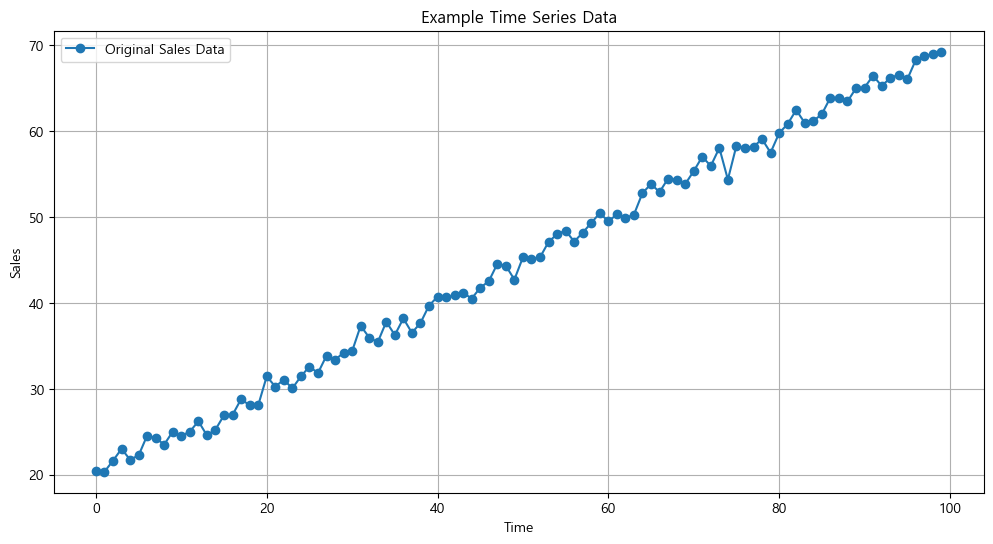

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -147.355
Date:                Wed, 09 Oct 2024   AIC                            306.710
Time:                        16:23:08   BIC                            322.096
Sample:                             0   HQIC                           312.929
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2731      0.156     -1.745      0.081      -0.580       0.034
ar.L2          0.7367      0.110      6.726      0.000       0.522       0.951
ar.L3          0.5334      0.107      4.962      0.0

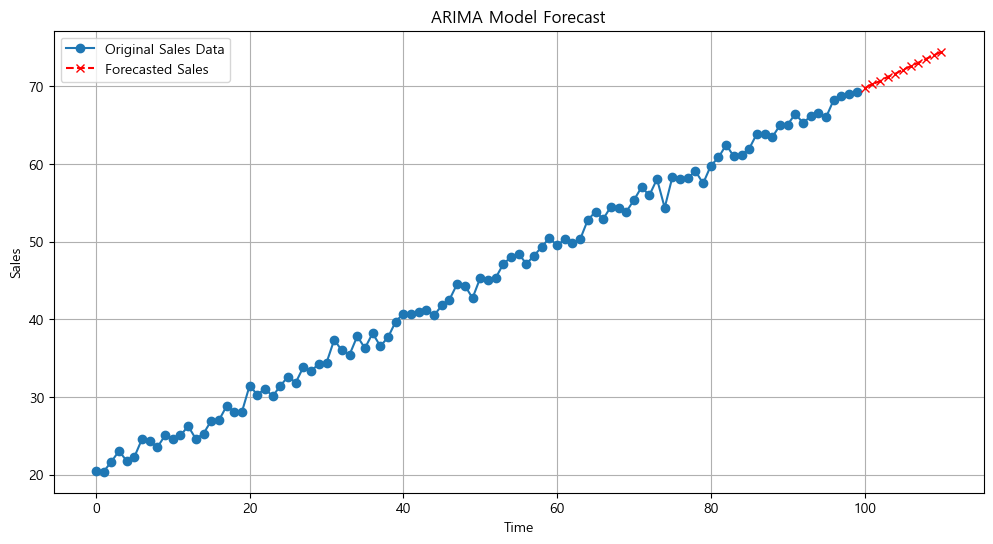

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. 예시 데이터 생성 (랜덤 시계열 데이터)
np.random.seed(42)  # 재현 가능성을 위한 시드 값 설정
n = 100  # 데이터 포인트 수
noise = np.random.normal(0, 1, n)  # 평균 0, 표준편차 1의 노이즈 생성
data = pd.Series(20 + 0.5 * np.arange(n) + noise, name='Sales')  # 트렌드가 있는 데이터 생성

# 2. 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# 3. ARIMA 모형 학습
# ARIMA 모형의 (p, d, q) 차수 설정
p_value = 3  # AR 모형의 차수
d_value = 1  # 차분 횟수 (데이터의 비정상성을 제거하기 위한 차분 차수)
q_value = 2  # MA 모형의 차수
# enforce_stationarity와 enforce_invertibility를 False로 설정
arima_model = ARIMA(data, order=(p_value, d_value, q_value), enforce_stationarity=False, enforce_invertibility=False).fit()


# 4. 모델 요약
print(arima_model.summary())

# 5. 예측 수행
forecast_start = len(data)  # 예측 시작점 (현재 데이터 끝부분)
forecast_end = forecast_start + 10  # 예측 종료점 (현재 데이터 이후 10개 포인트 예측)
forecast = arima_model.predict(start=forecast_start, end=forecast_end)

# 6. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Sales Data', marker='o')
plt.plot(forecast, label='Forecasted Sales', marker='x', linestyle='--', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()
